In [2]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(market_data_df)


In [7]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(
    scaled_data, 
    columns=market_data_df.columns, 
    index=market_data_df.index
)

# Copy the crypto names from the original data
crypto_names = market_data_df.index  # This keeps the 'coin_id' as index

# Set the coinid column as index
#scaled_market_data_df = scaled_market_data_df.set_index(market_data_df[['coin_id']])

# Display sample data
scaled_market_data_df.sample(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
wrapped-bitcoin,0.515453,0.461843,0.769975,0.224045,-0.074674,-0.355054,-0.251623
bitcoin-cash-sv,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029
crypto-com-chain,0.331280,-1.614844,-1.054521,-0.729931,-0.350155,-0.022866,-0.034570
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351
havven,-1.428574,-0.025510,-1.628859,-0.860354,-0.840714,0.898815,0.268647


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(scaled_market_data_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': list(k_values), 'inertia' : inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_data_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

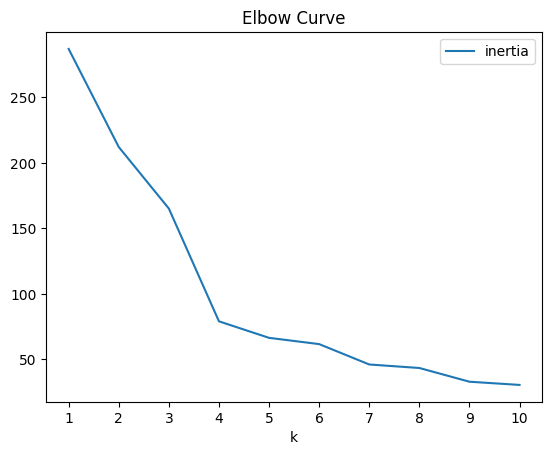

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data_df.plot.line(
    x='k', 
    y='inertia', 
    title='Elbow Curve', 
    xticks=k_values, 
)


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [10]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=2)

In [11]:
# Fit the K-Means model using the scaled data
fit_data = kmeans.fit(scaled_market_data_df)

In [12]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_data = kmeans.predict(scaled_market_data_df)

# View the resulting array of cluster values.
predicted_data

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [13]:
# Create a copy of the DataFrame
scaled_market_data_df_copy = scaled_market_data_df.copy()

In [14]:
# Add a new column to the DataFrame with the predicted clusters
scaled_market_data_df_copy['Clusters'] = predicted_data

# Display sample data
scaled_market_data_df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

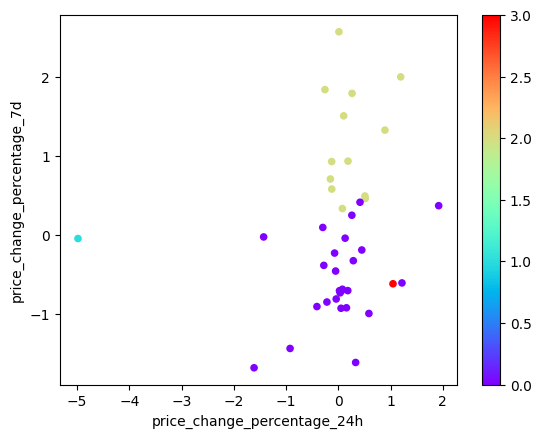

In [15]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_market_data_df_copy.plot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d',
    c=scaled_market_data_df_copy['Clusters'],
    colormap='rainbow',)


### Optimize Clusters with Principal Component Analysis.

In [22]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [23]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
scaled_market_data_reduced = pca.fit_transform(scaled_market_data_df)

# View the first five rows of the DataFrame. 
scaled_market_data_reduced[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [24]:
explained_variance = pca.explained_variance_ratio_
explained_variance.sum()


0.8950316570309842

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309842

In [38]:
# Create a new DataFrame with the PCA data.
scaled_market_data_reduced_df = pd.DataFrame(
    scaled_market_data_reduced, 
    columns=['PCA1', 'PCA2', 'PCA3'], 
    index=scaled_market_data_df.index
)

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
scaled_market_data_reduced_df

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [39]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values2 = list(range(1, 11))

# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k_values2:
    k_model2 = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model2.fit(scaled_market_data_reduced_df)
    inertia2.append(k_model2.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {'k': list(k_values2), 'inertia' : inertia2}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data2_df = pd.DataFrame(elbow_data2)

# Display the DataFrame
elbow_data2_df

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

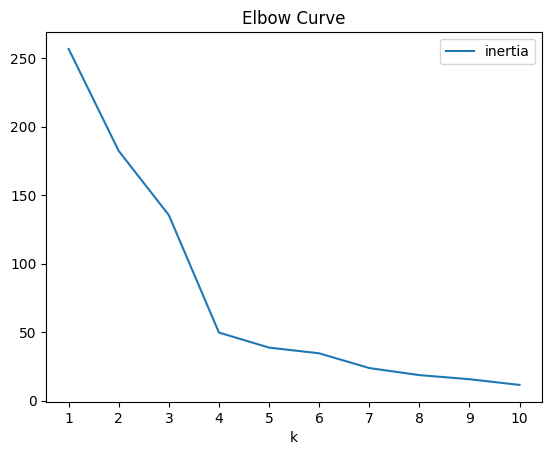

In [40]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data2_df.plot.line(
    x='k', 
    y='inertia', 
    title='Elbow Curve', 
    xticks=k_values2, 
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 is where the line flattens the most, so I choose 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it looks the same

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [41]:
# Initialize the K-Means model using the best value for k
kmeans2 = KMeans(n_clusters=4, random_state=2)

In [42]:
# Fit the K-Means model using the PCA data
fit_data2 = kmeans2.fit(scaled_market_data_reduced_df)

In [43]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_data2 = kmeans2.predict(scaled_market_data_reduced_df)

# Print the resulting array of cluster values.
predicted_data2

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [44]:
# Create a copy of the DataFrame with the PCA data
scaled_market_data_reduced_df_copy = scaled_market_data_reduced_df.copy()

# Add a new column to the DataFrame with the predicted clusters
scaled_market_data_reduced_df_copy['Clusters'] = predicted_data2

# Display sample data
scaled_market_data_reduced_df_copy

,PCA1,PCA2,PCA3,Clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

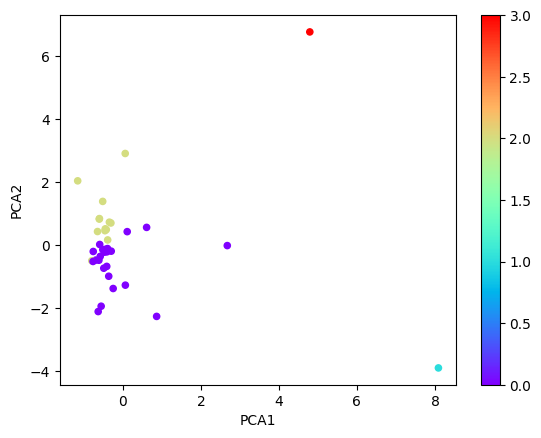

In [45]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. 
scaled_market_data_reduced_df_copy.plot.scatter(
    x='PCA1', 
    y='PCA2',
    c=scaled_market_data_reduced_df_copy['Clusters'],
    colormap='rainbow',)

### Determine the Weights of Each Feature on each Principal Component

In [47]:
# Use the columns from the original scaled DataFrame as the index.
explained_variance2 = pca.explained_variance_ratio_
explained_variance2

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** ethland had the greatest influence in PCA1 at 8.089018 , and also the greatest negative influence in PCA2 at -3.896891
    